# Pytorch

In [1]:
import torch

In [2]:
torch.cuda.is_available()

False

In [ ]:
import torch

# Using torch.tensor (similar to tf.constant)
constant_tensor = torch.tensor([1, 2, 3])

# Using torch.nn.Parameter (similar to tf.Variable)
variable_tensor = torch.nn.Parameter(torch.tensor([1, 2, 3], dtype=torch.float32))

# If you want to create a regular tensor (not a parameter) with requires_grad=True
# requires_grad=False - НЕ рахує похідну, requires_grad=True - рахує
variable_tensor_non_param = torch.tensor([1, 2, 3], dtype=torch.float32, requires_grad=True)

# Print the tensors
print("Constant Tensor:", constant_tensor)
print("Variable Tensor (Parameter):", variable_tensor)
print("Variable Tensor (non-Parameter)", variable_tensor_non_param)

Constant Tensor: tensor([1, 2, 3])
Variable Tensor (Parameter): Parameter containing:
tensor([1., 2., 3.], requires_grad=True)
Variable Tensor (non-Parameter) tensor([1., 2., 3.], requires_grad=True)


In [8]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt


class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        # Initialize the weights to '5.0' and the bias to '0.0'
        # In practice , these should be randomly initialized
        self.w = nn.Parameter(torch.tensor(5.0, dtype=torch.float32))
        self.b = nn.Parameter(torch.tensor(0.0, dtype=torch.float32))

    def forward(self, x):
        return self.w * x + self.b
    
def loss(target_y, predicted_y): # Mean Squared Error
    return torch.mean((target_y - predicted_y)**2)

def train(model, x, y, learning_rate):
    # Backpropagation, good explanation: https://medium.com/@mugeshk/backpropagation-algorithm-using-pytorch-ee1287888aca
    current_loss = loss(y, model(x))
    model.zero_grad()
    current_loss.backward() # https://pytorch.org/docs/stable/generated/torch.Tensor.backward.html

    with torch.no_grad():
        model.w -= learning_rate * model.w.grad
        model.b -= learning_rate * model.b.grad

def training_loop(model, x, y):
    for epoch in range(10):
        train(model, x, y, learning_rate=0.1)
        current_loss = loss(y, model(x))
        print(f"Loss: {current_loss.item()}")

# Please note that PyTorch uses dynamic computation graphs, so there's no need for a separate GradientTape as in TensorFlow
# The gradients are automatically calculated during the backward pass
# Also, the loss function and the training loop have been adjusted to use PyTorch syntax

Loss: 6.174999237060547
Loss: 3.9825637340545654
Loss: 2.7143919467926025
Loss: 1.9748276472091675
Loss: 1.539980173110962
Loss: 1.2822182178497314
Loss: 1.1282165050506592
Loss: 1.0355095863342285
Loss: 0.9793027639389038
Loss: 0.9449989795684814


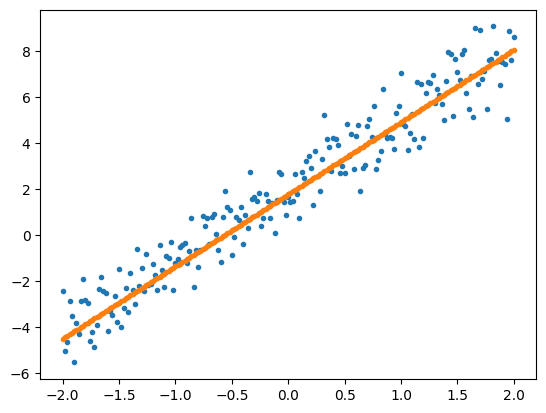

In [10]:
# Example usage

# A vector of random x values
NUM_EXAMPLES = 201
x = torch.linspace(-2, 2, steps=NUM_EXAMPLES, dtype=torch.float32)

# Generate some noise
noise = torch. randn(NUM_EXAMPLES)

# The actual line
TRUE_W = 3.0
TRUE_B = 2.0

def f(x):
    return x * TRUE_W + TRUE_B

# Calculate y
y = f(x) + noise

linear_model = LinearModel()
training_loop(linear_model, x, y)

y_pred = linear_model(x)

#Plot all the data
plt.plot(x, y, ".")
plt.plot(x, y_pred.detach().numpy(), ".") # .tensor.detach().numpy()

## Which framework to use?

PyTorch and TensorFlow are two of the most popular deep learning frameworks, and while they share many similarities, there are some key differences between them:
**Dynamic vs. Static Computational Graph:** 
- `PyTorch`: PyTorch uses a dynamic computational graph. This means that the graph is built on-the-fly as operations are executed. It allows for more flexibility and ease of debugging.
- `TensorFlow`: TensorFlow traditionally used a static computational graph. However, with the introduction of TensorFlow 2.x, eager execution became the default mode, providing a dynamic graph similar to PyTorch. TensorFlow 2.x allows users to switch between static and dynamic graphs.
**API Style:**
- `PyTorch`: PyTorch uses a more imperative and Pythonic syntax. It is often considered more intuitive and easier to learn for researchers and beginners.
- `TensorFlow`: TensorFlow has a more declarative and somewhat more verbose syntax. However, TensorFlow 2. with eager execution is more similar to PyTorch in terms of syntax.
**Community and Adoption:**
- `PyTorch`: PyTorch gained popularity in the research community, and many researchers appreciate its dynamic graph and ease of use. It is often the preferred choice for prototyping and experimentation.
- `TensorFlow`: TensorFlow has been widely adopted in both research and industry. Its static graph mode was historically favored in production settings, and TensorFlow's ecosystem includes many tools for deploying models at scale.

**Visualization Tools:**
- `PyTorch`: PyTorch's models can also be visualized in TensorBoard.
- `TensorFlow`: TensorFlow has TensorBoard, which is a powerful visualization tool for monitoring and debugging models during training. It includes features for graph visualization, loss curves, and more.
**Ecosystem and Integration:**
- `PyTorch`: PyTorch has a more concise and modular ecosystem. It is often praised for its ease of integration with other libraries and tools.
- `TensorFlow`: TensorFlow has a more extensive ecosystem, including Tensorflow Extended (TFX) for end-to-end machine learning pipelines. It is well-integrated with TensorFlow Lite for mobile and edge devices.
**Automatic Differentiation:**
- `PyTorch`: PyTorch uses dynamic computation for automatic differentiation, making it easy to compute gradients of complex operations on-the-fly.
- `TensorFlow`: TensorFlow's eager execution mode and TensorFlow 2. make automatic differentiation more similar to PyTorch.

Additional information: https://www.datacamp.com/tutorial/pytorch-vs-tensorflow-vs-keras